In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [3]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR = "FashionMNISTDir"
    self.EPOCH = 10
    self.BATCH_SIZE = 32
    self.LEARNING_RATE = 0.01
    self.IMAGE_SIZE = (28, 28)
    self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"this notebook is using device: {self.DEVICE}")
    self.SEED = 2022

config = Config()

this notebook is using device: cuda


In [4]:
train_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.shape


torch.Size([10000, 28, 28])

In [7]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
given_label_map = train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
label_map = {val: key for key, val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

## Visualize one of the samples

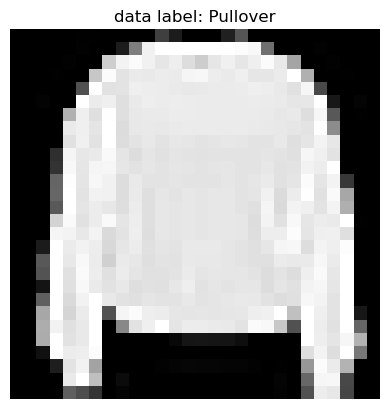

In [11]:
def view_sample_img(data, idx, label_map):
  plt.imshow(data.data[idx], cmap="gray")
  plt.title(f"data label: {label_map[data.targets[idx].item()]}")
  plt.axis("off")

view_sample_img(train_data, 7, label_map)

## Create the dataloader

In [12]:
train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = config.BATCH_SIZE,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = config.BATCH_SIZE,
    shuffle = False
)

In [13]:
for images, labels in train_data_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [14]:
images[0].shape

torch.Size([1, 28, 28])

In [15]:
images[0].squeeze().shape

torch.Size([28, 28])

In [16]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.01176471, 0.00392157, 0.        ,
        0.        , 0.13333334, 0.4627451 , 0.16078432, 0.10588235,
        0.17254902, 0.45490196, 0.04313726, 0.        , 0.        ,
        0.01176471, 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.9764706 , 0.9764706 , 0.9647059 , 0.9764706 ,
        0.9529412 , 1.        , 0.7058824 , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.00392157, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19215687, 0.4627451 , 0.77254903,
        0.8784314 , 0.9137255 , 0.8862745 , 0.827451  , 0.7882353 ,
        0.9529412 , 0.9098

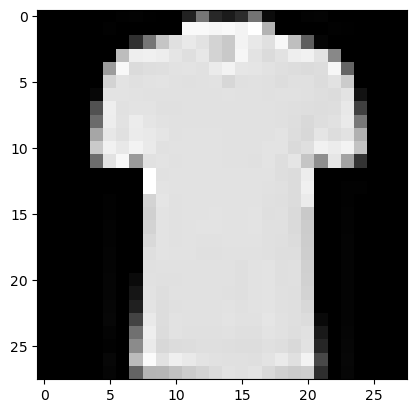

In [17]:
plt.imshow(images[0].squeeze(), cmap="gray")

In [18]:
images[0].shape, images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [19]:
images[0][0].shape

torch.Size([28, 28])

In [20]:
images[0].squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0118, 0.0039,
         0.0000, 0.0000, 0.1333, 0.4627, 0.1608, 0.1059, 0.1725, 0.4549, 0.0431,
         0.0000, 0.0000, 0.0118, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.9765, 0.9765, 0.9647, 0.9765, 0.9529, 1.0000, 0.7059,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1922, 0.4627,
         0.7725, 0.8784, 0.9137, 0.8863, 0.8275, 0.7882, 0.9529, 0.9098, 0.8784,
         0.9686, 0.7490, 0.3686, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7412, 0.9333, 0.9412,
         0.9294, 0.8980, 0.8745, 0.9059, 0.8275, 0.7882, 0.9647, 0.8902, 0.8588,
         0.8863, 0.9333, 0.9451, 0.8902, 0.5333, 0.0000

In [21]:
images[0].unsqueeze(dim=1)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0118,
           0.0039, 0.0000, 0.0000, 0.1333, 0.4627, 0.1608, 0.1059, 0.1725,
           0.4549, 0.0431, 0.0000, 0.0000, 0.0118, 0.0157, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.9765, 0.9765, 0.9647, 0.9765, 0.9529,
           1.0000, 0.7059, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0039,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1922,
           0.4627, 0.7725, 0.8784, 0.9137, 0.8863, 0.8275, 0.7882, 0.9529,
           0.9098, 0.8784, 0.9686, 0.7490, 0.3686, 0.0196, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7412, 0.9333,
           0.9412, 0.9294, 0.8980, 0.8745, 0.9059, 0.8275, 0.7882, 0.9647,
           0.8902, 0.8588, 0.8863, 0.9333, 

In [22]:
class CNN(nn.Module):
  def __init__(self, in_, out_):
    super(CNN, self).__init__()

    self.conv_pool_01 = nn.Sequential(
        nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_pool_02 = nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.Flatten = nn.Flatten()
    self.FC_01 = nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02 = nn.Linear(in_features=128, out_features=64)
    self.FC_03 = nn.Linear(in_features=64, out_features=out_)

  def forward(self, x):
    x = self.conv_pool_01(x)
    x = self.conv_pool_02(x)
    x = self.Flatten(x)
    x = self.FC_01(x)
    x = F.relu(x)
    x = self.FC_02(x)
    x = F.relu(x)    
    x = self.FC_03(x)
    return x

In [23]:
model = CNN(1, 10)

print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [24]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [25]:
next(model.parameters()).is_cuda

False

In [26]:
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [27]:
next(model.parameters()).is_cuda

True

## Count the no. of trainable parameters

In [28]:
def count_params(model):
  model_params = {"Modules": list(), "Parameters": list()}
  total = {"trainable": 0, "non_trainable": 0} 
  for name, parameters in model.named_parameters():
    param = parameters.numel()
    if not parameters.requires_grad:
      total["non_trainable"] += param
      continue
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] += param
  df = pd.DataFrame(model_params)
  df = df.style.set_caption(f"Total parameters: {total}")
  return df

count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


## Training loop

In [29]:
criterion = nn.CrossEntropyLoss() ## loss function
optimizer = torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

In [30]:
for epoch in range(config.EPOCH):
  with tqdm(train_data_loader) as tqdm_epoch:
    for images, labels in tqdm_epoch:
      tqdm_epoch.set_description(f"Epoch {epoch + 1}/{config.EPOCH}")

      # put the images on device
      images = images.to(config.DEVICE)
      labels = labels.to(config.DEVICE)

      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels) # TODO #<< passing the pred, target

      # backward prop
      optimizer.zero_grad() # past gradient
      loss.backward() # calculate the gradients
      optimizer.step() # weights updated

      tqdm_epoch.set_postfix(loss=loss.item())

Epoch 10/10: 100%|██████████| 1875/1875 [00:12<00:00, 154.33it/s, loss=0.214] 


### Save the model

In [31]:
os.makedirs("model_dir", exist_ok=True)
model_file_path = os.path.join("model_dir", "CNN_model.pth")
torch.save(model, model_file_path)

### Load the model

In [32]:
loaded_model = torch.load(model_file_path)

## Evaluate our model

In [33]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
  for batch, data in enumerate(test_data_loader):
    images = data[0].to(config.DEVICE)
    labels = data[1].to(config.DEVICE)

    y_pred = model(images)

    pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
    target = np.concatenate((target, labels.cpu().numpy()))

In [34]:
cm = confusion_matrix(target, pred)

In [35]:
label_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

<Axes: >

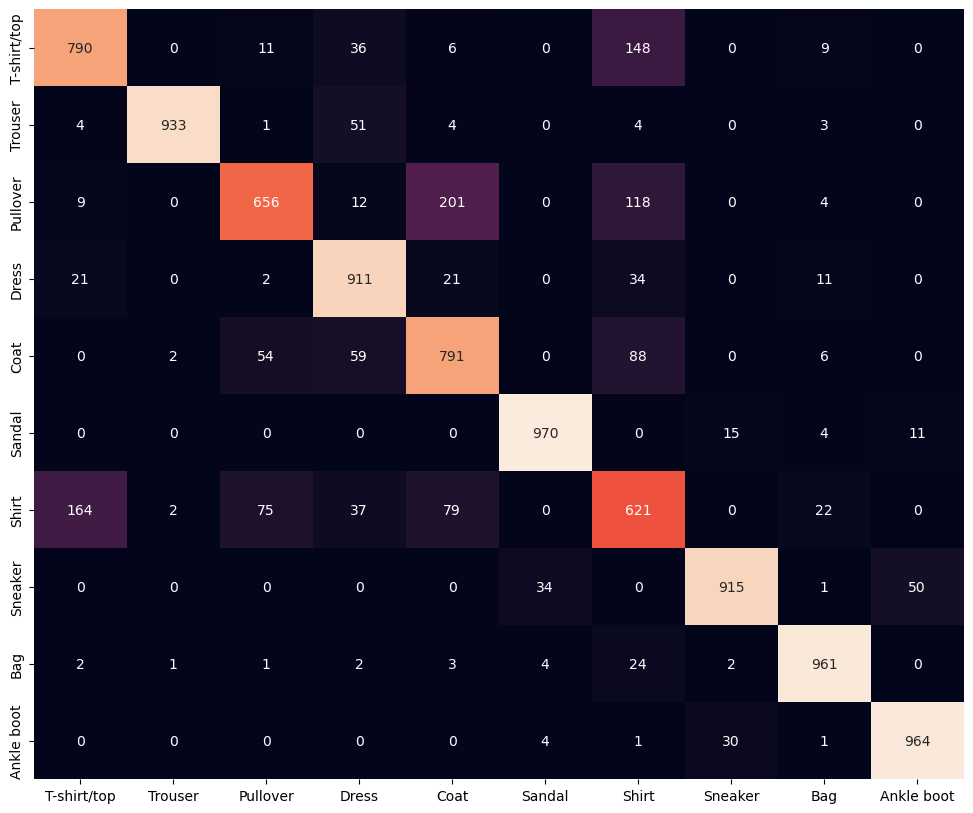

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values() , yticklabels=label_map.values(), cbar=False)

## prediction on our model